<h1> Cleansing Data </h1>

<h3>Dataset Dictionaries </h3>

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import preprocessing

In [2]:
#import dataset

df = pd.read_excel('adult.xlsx',sheet_name='Sheet1')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [3]:
#check atribute info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


<h3> Handling Outliers </h3>

In [4]:
#fungsi mencari nilai lower bound dan upper bound dari suatu dataframe

def get_lower_upper_bound(x):
    q1 = np.percentile(x,25)
    q3 = np.percentile(x,75)
    iqr = q3 - q1
    lb = q1 - (iqr*1.5)
    ub = q3 + (iqr*1.5)
    return lb,ub

In [5]:
#fungsi mencari outliers dari suatu dataframe

def get_outliers_iqr(x):
    lb,ub = get_lower_upper_bound(x)
    return x[np.where((x>ub) | (x<lb))]

In [6]:
# drop outliers with iqr

def remove_outliers_iqr(df):
    Lb,Ub = get_lower_upper_bound(df)
    df_final = df[(df>=Lb) & (df<=Ub)]
    return df_final

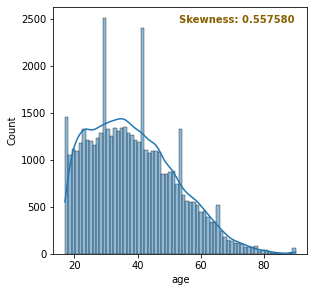

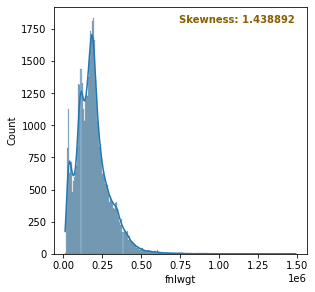

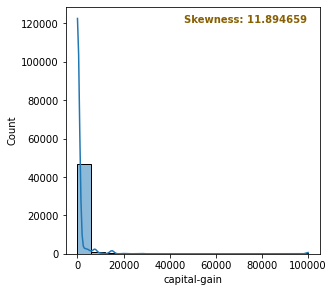

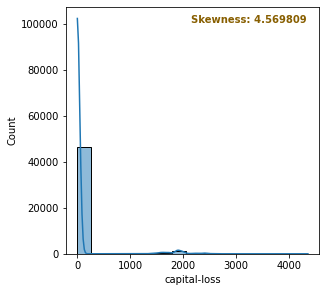

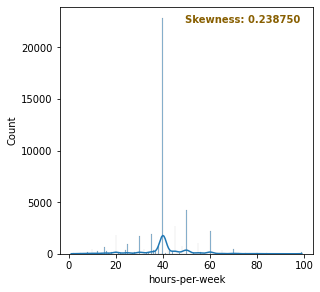

In [7]:
#plotting histogram

plt.figure(figsize=(10, 10))
ax1=plt.subplot(221)
sns.histplot(df['age'],kde=True)
plt.text(x=0.95, y=0.97,transform=ax1.transAxes ,s="Skewness: %f" % df['age'].skew(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
plt.show()

plt.figure(figsize=(10, 10))
ax2=plt.subplot(221)
sns.histplot(df['fnlwgt'],kde=True)
plt.text(x=0.95, y=0.97,transform=ax2.transAxes ,s="Skewness: %f" % df['fnlwgt'].skew(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
plt.show()

plt.figure(figsize=(10, 10))
ax3=plt.subplot(221)
sns.histplot(df['capital-gain'],kde=True)
plt.text(x=0.95, y=0.97,transform=ax3.transAxes ,s="Skewness: %f" % df['capital-gain'].skew(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
plt.show()

plt.figure(figsize=(10, 10))
ax4=plt.subplot(221)
sns.histplot(df['capital-loss'],kde=True)
plt.text(x=0.95, y=0.97,transform=ax4.transAxes ,s="Skewness: %f" % df['capital-loss'].skew(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
plt.show()

plt.figure(figsize=(10, 10))
ax5=plt.subplot(221)
sns.histplot(df['hours-per-week'],kde=True)
plt.text(x=0.95, y=0.97,transform=ax5.transAxes ,s="Skewness: %f" % df['hours-per-week'].skew(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
plt.show()

- skewness normal (<1) : missing value diganti dengan mean, outliers dibuang semua
- skewness abnormal (>1) : missing value diganti dengan median, dibuang titik terjauh(gunakan boxplot).

dapat dilihat bahwa, atribut numerik yang memiliki skewness normal adalah 'hours-per-week' dan 'age'. sedangkan untuk atribute numerik yang memiliki skewness abnormal adalah 'fngwt', 'capital-gain' dan 'capital-loss'. 

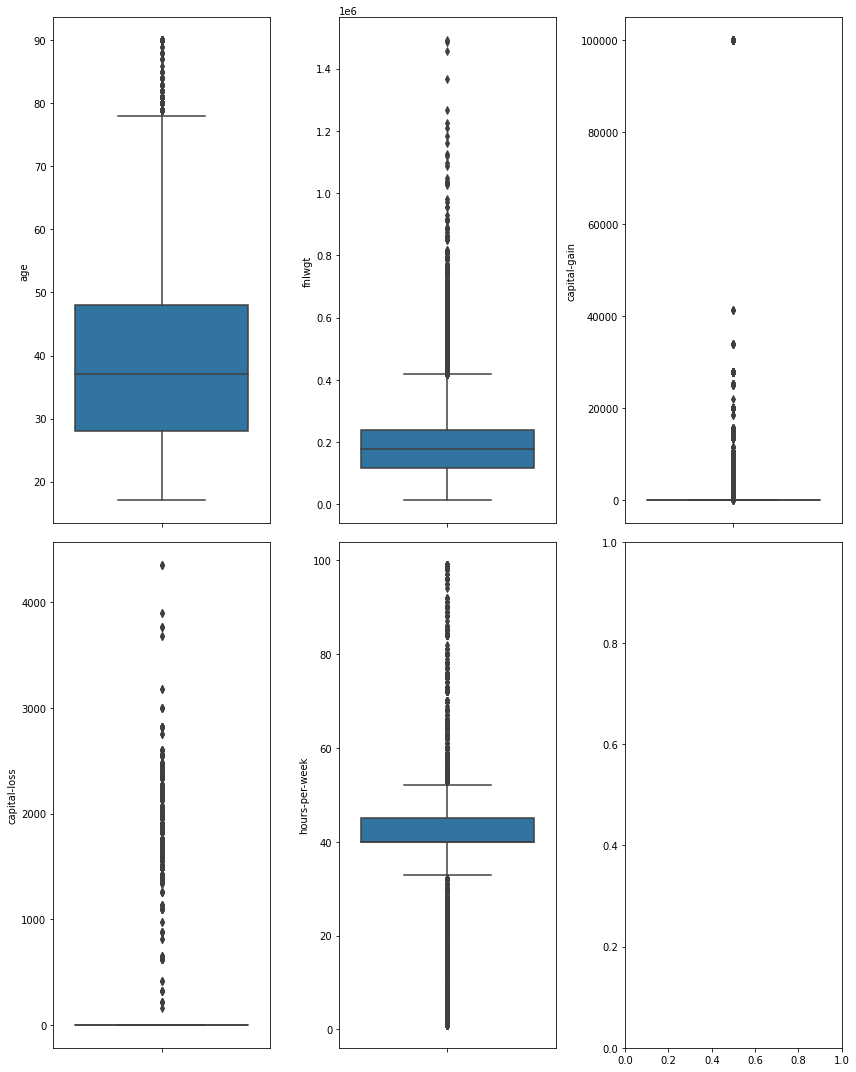

In [8]:
#boxploting untuk melihat fliers dari atribut numerik

fig, axs = plt.subplots(2,3,figsize=(12,15))
plt1 = sns.boxplot(y=df['age'], ax = axs[0,0])
plt2 = sns.boxplot(y=df['fnlwgt'], ax = axs[0,1])
plt3 = sns.boxplot(y=df['capital-gain'], ax = axs[0,2])
plt4 = sns.boxplot(y=df['capital-loss'], ax = axs[1,0])
plt5 = sns.boxplot(y=df['hours-per-week'], ax = axs[1,1])
plt.tight_layout()

In [9]:
#fungsi mencari nilai lower bound dan upper bound dari suatu dataframe

def get_lower_upper_bound(x):
    q1 = np.percentile(x,25)
    q3 = np.percentile(x,75)
    iqr = q3 - q1
    lb = q1 - (iqr*1.5)
    ub = q3 + (iqr*1.5)
    return lb,ub

#fungsi mencari outliers dari suatu dataframe

def get_outliers_iqr(x):
    lb,ub = get_lower_upper_bound(x)
    return x[np.where((x>ub) | (x<lb))]


In [10]:
#cari tahu banyaknya fliers di atribut numerik

df_numeric = df[['age','hours-per-week','fnlwgt','capital-gain','capital-loss']]
for i in df_numeric:
    print("banyaknya fliers dari variabel",i,":",len(get_outliers_iqr(df_numeric[i].values)))

banyaknya fliers dari variabel age : 216
banyaknya fliers dari variabel hours-per-week : 13496
banyaknya fliers dari variabel fnlwgt : 1453
banyaknya fliers dari variabel capital-gain : 4035
banyaknya fliers dari variabel capital-loss : 2282


dilihat dari banyaknya fliers dari atribut 'hours-per-week', walaupun atribut tersebut masuk kedalam kategori skewness normal, membuang semua fliers(outliers) dari atribute tersebut akan mengakibatkan menurunnya jumlah data secara drastis. hal ini mengakibatkan model yang tidak akurat. jadi kami sepakat untuk menghapus semua fliers(outliers) hanya dari atribut 'age' saja.

In [11]:
#removing outliers atribut 'age'.

Q1_age = df['age'].quantile(0.25)
Q3_age = df['age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

df.loc[df['age']>(Q3_age+ 1.5 * IQR_age),'age']=Q3_age

<AxesSubplot:xlabel='age'>

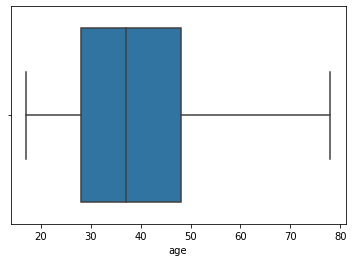

In [12]:
sns.boxplot(x = df['age'])

dapat dilihat sudah tidak ada lagi fliers di atribute 'age'.

In [13]:
#membuang sebagian outliers dari atribut 'fnwgt', 'capital-gain' dan 'capital-loss'

#buang titik terjauh di fnlwgt
df=df.loc[df['fnlwgt'] < 1400000,:]

# #buang titik terjauh di fare
df=df.loc[df['capital-gain']<80000,:]

# #buang titik terjauh di fare
df=df.loc[df['capital-loss']<4000,:]


kami sepakat bahwa : 
- titik terjauh dari fnlwgt ada diatas 1400000 
- titik terjauh dari capital-gain ada diatas 80000
- titik terjauh dari capital-loss ada diatas 4000

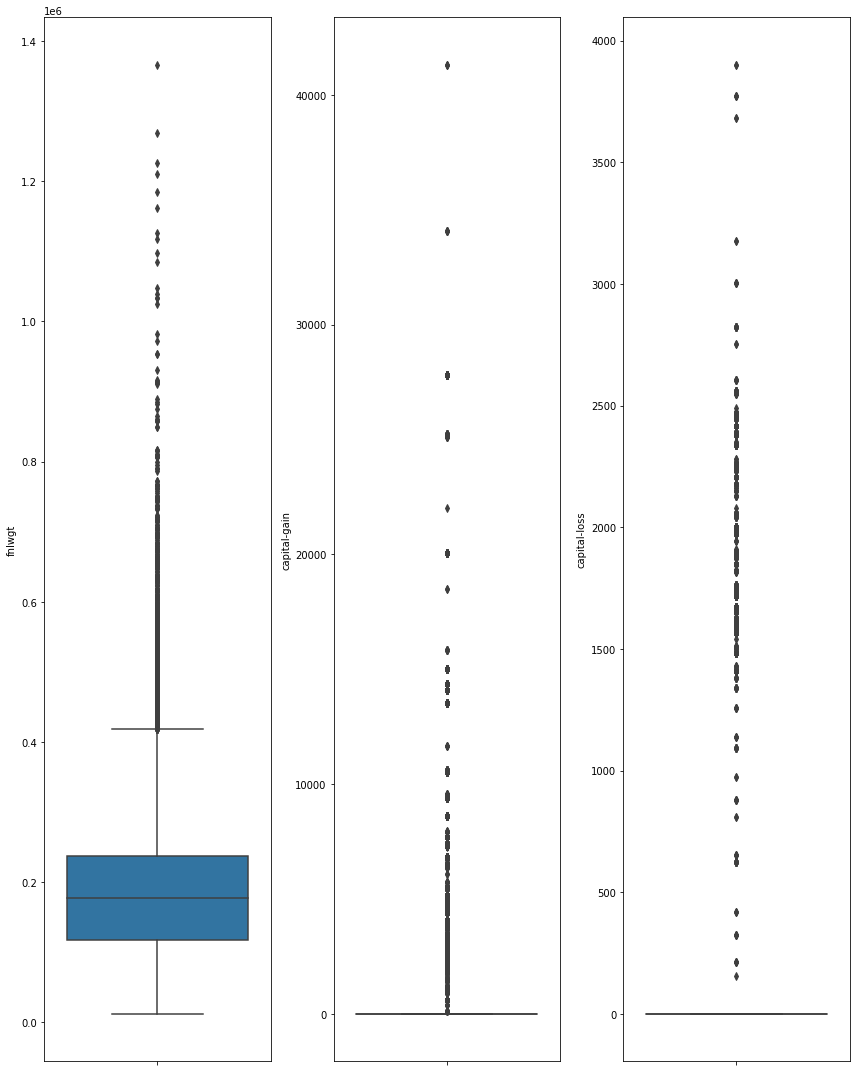

In [14]:
#boxploting untuk melihat fliers dari atribut numerik

fig2, axs2 = plt.subplots(1,3,figsize=(12,15))
plt6 = sns.boxplot(y=df['fnlwgt'], ax = axs2[0])
plt7 = sns.boxplot(y=df['capital-gain'], ax = axs2[1])
plt8 = sns.boxplot(y=df['capital-loss'], ax = axs2[2])

plt.tight_layout()

sudah dapat dilihat, beberapa titik terjauh dari ketiga atribut diatas sudah dibuang

In [15]:
#melihat unique value dari atribut 'education-num'

print(df['education-num'].unique())
print("terdapat : ",len(df['education-num'].unique())," unique value dari atribut education-num")

[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
terdapat :  16  unique value dari atribut education-num


untuk mengecek outliers atribut 'education-num', dilakukan secara manual, karena atribut ini adalah ketegorikal namun tipe datanya numerik. lalu valuenya berdasarkan jumlah unique value dari atribut 'education'. <br><br>
dapat dilihat bahwa, dari unique value atribut 'education-num' tidak terdapat value yang diluar range [1-16]
 

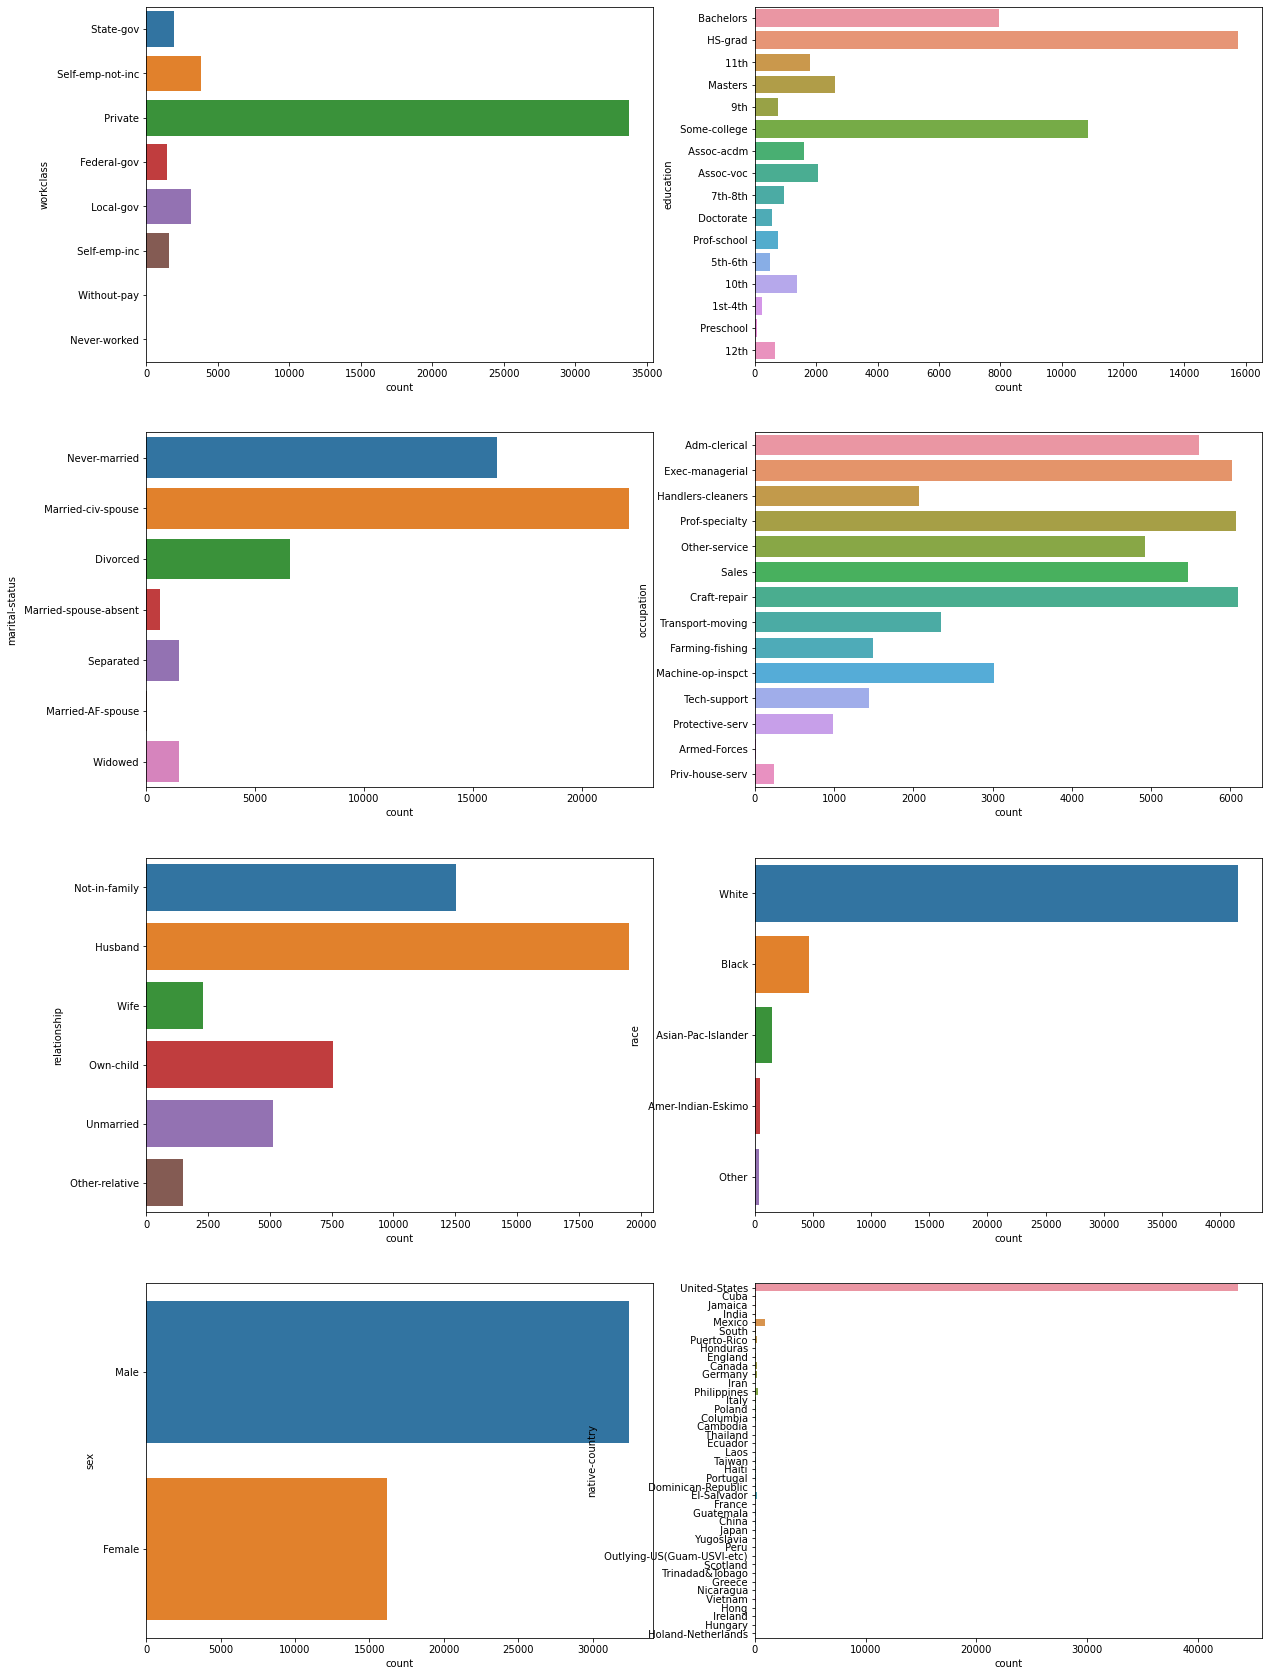

In [16]:
#countploting to see outliers from categorical atribute

fig2, axs2 = plt.subplots(4,2,figsize=(20,30))
plt9 = sns.countplot(y=df['workclass'], ax=axs2[0,0])
plt10 = sns.countplot(y=df['education'], ax=axs2[0,1])
plt11 = sns.countplot(y=df['marital-status'], ax=axs2[1,0])
plt12 = sns.countplot(y=df['occupation'], ax=axs2[1,1])
plt13 = sns.countplot(y=df['relationship'], ax=axs2[2,0])
plt14 = sns.countplot(y=df['race'], ax=axs2[2,1])
plt15 = sns.countplot(y=df['sex'], ax=axs2[3,0])
plt16 = sns.countplot(y=df['native-country'], ax=axs2[3,1])
plt.show()

kami menggunakan countplot untuk mencari nilai outliers dari aribut kategorikal, dan dapat dilihat semua atribut kategorik tidak memiliki outliers kecuali atribut 'native-country'. unique value atribut tersebut terlalu banyak sehingga sedikit sulit untuk dilihat melalui countplot.

In [17]:
#lihat unique value dari atribut 'native-country'

df['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', nan, ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [18]:
#removing outliers from atribute 'native-country'

df = df[df['native-country'] != ' South']

di kamus dataset, tidak terdapat 'South' dalam atribut 'native-country'. Sehingga dapat disimpulkan bahwa value south merupakan outliers dari atribut 'native-country'.

In [19]:
df['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', nan, ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Italy', ' Poland', ' Columbia',
       ' Cambodia', ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti',
       ' Portugal', ' Dominican-Republic', ' El-Salvador', ' France',
       ' Guatemala', ' China', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary', ' Holand-Netherlands'], dtype=object)

cek kembali atribute 'native-country'

<h3> Handling Missing Value </h3>

In [20]:
#Cek missing value dari setiap atribut

df.isna().sum()

age                  0
workclass         2779
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2789
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     847
income               0
dtype: int64

dapat dilihat bahwa terdapat sebanyak 2779 data yang kosong dari atribut 'workclass', 2789 data yang kosong dari atribut 'occupation', dan 847 data yang kosong dari atribut 'native-country'. <br><br>
perlu diperhatikan bahwa ketiga atribut tersebut merupakan atribut kategorikal, sehingga metode handling missing value yang tepat untuk ketiga atribut tersebut adalah dengan mereplacenya dengan nilai modus.

In [21]:
#handling missing value (replace dengan modus)

df['workclass'].fillna(df['workclass'].mode()[0],inplace=True)
df['occupation'].fillna(df['occupation'].mode()[0],inplace=True)
df['native-country'].fillna(df['native-country'].mode()[0],inplace=True)

In [22]:
#Cek missing value dari setiap atribut

df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

dapat dilihat bahwa sudah tidak ada lagi data yang kosong dari dataset.

# Features subset selection

In [23]:
df[['education','education-num']]

,education,education-num
0,Bachelors,13
1,Bachelors,13
2,HS-grad,9
3,11th,7
4,Bachelors,13
...,...,...
48837,Bachelors,13
48838,HS-grad,9
48839,Bachelors,13
48840,Bachelors,13


disini kami mendapati bahwa terdapat atribut yang memiliki makna yang sama. karena pada proses Preprocess ini nantinya data akan di transformasikan kedalam value numerik, maka atribut 'education' yang perlu kami di drop.

In [24]:
df_drop = df.drop(['education'],1)

In [25]:
df_drop

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38.0,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53.0,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28.0,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39.0,Private,215419,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64.0,Private,321403,9,Widowed,Craft-repair,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38.0,Private,374983,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44.0,Private,83891,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


# Encode atribut kategorikal

In [26]:
#cek data yang mirip

df_kategorikal = df_drop.drop(['age','fnlwgt','capital-gain','capital-loss','hours-per-week'],1)

for i in df_kategorikal:
    print(i," : ",df_kategorikal[i].unique() ,"\n")

workclass  :  [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay' ' Never-worked'] 

education-num  :  [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8] 

marital-status  :  [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed'] 

occupation  :  [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv'] 

relationship  :  [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative'] 

race  :  [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other'] 

sex  :  [' Male' ' Female'] 

native-country  :  [' United-States' ' Cuba' ' Jamaica' ' India' ' Mexico' ' Puerto-Rico'
 ' Honduras' ' England' ' Canada' ' Germany' ' Iran' ' Philippines'
 ' It

setelah diperhatikan, atribut income memiliki value yang mirip. yaitu value dengan tanda titik dan tanpa tanda titik. hal ini perlu kami atasi dengan menyama kan value yang mirip tersebut.

In [27]:
#replace value

df_drop['income'] = df_drop['income'].replace({' <=50K.':' <=50K',
                                               ' >50K.':' >50K'}) 
df_drop['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [28]:
#encoding value atribut kategorikal

categorical = df_drop.dtypes==object
categorical_cols = df_drop.columns[categorical].tolist()
df_drop[categorical_cols] = df_drop[categorical_cols].apply(lambda col: preprocessing.LabelEncoder().fit_transform(col))
df_drop

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,6,77516,13,4,0,1,4,1,2174,0,40,37,0
1,50.0,5,83311,13,2,3,0,4,1,0,0,13,37,0
2,38.0,3,215646,9,0,5,1,4,1,0,0,40,37,0
3,53.0,3,234721,7,2,5,0,2,1,0,0,40,37,0
4,28.0,3,338409,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39.0,3,215419,13,0,9,1,4,0,0,0,36,37,0
48838,64.0,3,321403,9,6,2,2,2,1,0,0,40,37,0
48839,38.0,3,374983,13,2,9,0,4,1,0,0,50,37,0
48840,44.0,3,83891,13,0,0,3,1,1,5455,0,40,37,0


# Transformasi Data

In [29]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48478 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48478 non-null  float64
 1   workclass       48478 non-null  int32  
 2   fnlwgt          48478 non-null  int64  
 3   education-num   48478 non-null  int64  
 4   marital-status  48478 non-null  int32  
 5   occupation      48478 non-null  int32  
 6   relationship    48478 non-null  int32  
 7   race            48478 non-null  int32  
 8   sex             48478 non-null  int32  
 9   capital-gain    48478 non-null  int64  
 10  capital-loss    48478 non-null  int64  
 11  hours-per-week  48478 non-null  int64  
 12  native-country  48478 non-null  int32  
 13  income          48478 non-null  int32  
dtypes: float64(1), int32(8), int64(5)
memory usage: 4.1 MB


In [30]:
#feature scalling menggunakan method MinMaxScler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_drop.astype(float)), columns=df_drop.columns)
df_scaled

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.360656,0.857143,0.048182,0.800000,0.666667,0.000000,0.2,1.00,1.0,0.052626,0.0,0.397959,0.948718,0.0
1,0.540984,0.714286,0.052463,0.800000,0.333333,0.230769,0.0,1.00,1.0,0.000000,0.0,0.122449,0.948718,0.0
2,0.344262,0.428571,0.150211,0.533333,0.000000,0.384615,0.2,1.00,1.0,0.000000,0.0,0.397959,0.948718,0.0
3,0.590164,0.428571,0.164301,0.400000,0.333333,0.384615,0.0,0.50,1.0,0.000000,0.0,0.397959,0.948718,0.0
4,0.180328,0.428571,0.240889,0.800000,0.333333,0.692308,1.0,0.50,0.0,0.000000,0.0,0.397959,0.102564,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48473,0.360656,0.428571,0.150043,0.800000,0.000000,0.692308,0.2,1.00,0.0,0.000000,0.0,0.357143,0.948718,0.0
48474,0.770492,0.428571,0.228328,0.533333,1.000000,0.153846,0.4,0.50,1.0,0.000000,0.0,0.397959,0.948718,0.0
48475,0.344262,0.428571,0.267904,0.800000,0.333333,0.692308,0.0,1.00,1.0,0.000000,0.0,0.500000,0.948718,0.0
48476,0.442623,0.428571,0.052891,0.800000,0.000000,0.000000,0.6,0.25,1.0,0.132050,0.0,0.397959,0.948718,0.0


<AxesSubplot:ylabel='Density'>

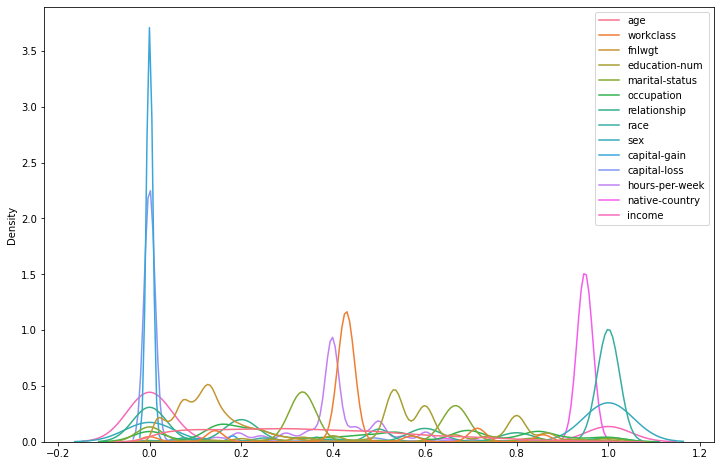

In [31]:
#kdeplot setelah dilakukan MinMaxScaler

fig3 = plt.subplots(figsize=(12,8))
sns.kdeplot(data=df_scaled)

In [32]:
#feature scalling menggunakan method StandardScaler

from sklearn.preprocessing import StandardScaler

scaler2 = StandardScaler()
df_scaled2 = pd.DataFrame(scaler2.fit_transform(df_drop.astype(float)), columns=df_drop.columns)
df_scaled2

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.041250,2.613336,-1.066103,1.146388,0.913682,-1.430308,-0.278726,0.389389,0.705423,0.629215,-0.217654,-0.029704,0.255773,-0.555254
1,0.862612,1.713317,-1.011013,1.146388,-0.411399,-0.683424,-0.903070,0.389389,0.705423,-0.229992,-0.217654,-2.214802,0.255773,-0.555254
2,-0.033419,-0.086719,0.247022,-0.414192,-1.736479,-0.185501,-0.278726,0.389389,0.705423,-0.229992,-0.217654,-0.029704,0.255773,-0.555254
3,1.086620,-0.086719,0.428358,-1.194482,-0.411399,-0.185501,-0.903070,-1.999324,0.705423,-0.229992,-0.217654,-0.029704,0.255773,-0.555254
4,-0.780112,-0.086719,1.414062,1.146388,-0.411399,0.810344,2.218653,-1.999324,-1.417590,-0.229992,-0.217654,-0.029704,-5.427903,-0.555254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48473,0.041250,-0.086719,0.244864,1.146388,-1.736479,0.810344,-0.278726,0.389389,-1.417590,-0.229992,-0.217654,-0.353422,0.255773,-0.555254
48474,1.907982,-0.086719,1.252395,-0.414192,2.238762,-0.932385,0.345619,-1.999324,0.705423,-0.229992,-0.217654,-0.029704,0.255773,-0.555254
48475,-0.033419,-0.086719,1.761750,1.146388,-0.411399,0.810344,-0.903070,0.389389,0.705423,-0.229992,-0.217654,0.779592,0.255773,-0.555254
48476,0.414596,-0.086719,-1.005499,1.146388,-1.736479,-1.430308,0.969963,-3.193680,0.705423,1.925930,-0.217654,-0.029704,0.255773,-0.555254


<AxesSubplot:ylabel='Density'>

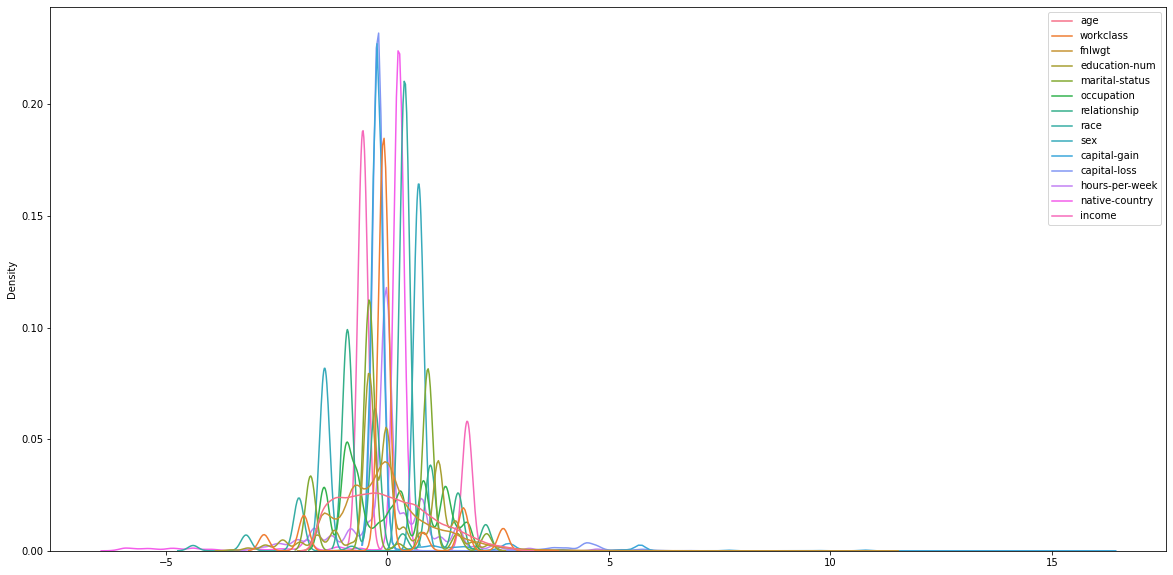

In [33]:
#kdeplot setelah dilakukan StandardScaler

fig4 = plt.subplots(figsize=(20,10))
sns.kdeplot(data=df_scaled2)

# Sampling

In [34]:
#sampling

sampling = df_scaled2.sample(frac=0.25)
sampling.shape

(12120, 14)

In [35]:
sampling

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
44970,0.041250,-0.086719,-1.413668,1.926677,-1.736479,0.810344,-0.278726,0.389389,0.705423,-0.229992,-0.217654,0.374944,0.255773,1.800978
24245,-0.556104,-0.086719,0.400836,-0.414192,-0.411399,0.312421,-0.903070,0.389389,0.705423,-0.229992,-0.217654,0.941451,-1.811018,-0.555254
8846,1.385297,-0.086719,-0.150480,1.146388,-0.411399,1.308267,-0.903070,0.389389,0.705423,-0.229992,4.509672,-0.029704,0.255773,1.800978
28858,1.086620,-0.086719,-0.021915,-0.024047,-0.411399,-0.932385,-0.903070,0.389389,0.705423,-0.229992,-0.217654,2.074465,0.255773,-0.555254
4255,0.563935,-0.086719,0.249846,-0.414192,-1.736479,0.810344,1.594308,0.389389,-1.417590,-0.229992,-0.217654,-0.029704,0.255773,-0.555254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19497,-1.452136,-0.086719,-0.007579,-0.414192,0.913682,1.308267,1.594308,-1.999324,-1.417590,-0.229992,-0.217654,-1.648295,0.255773,-0.555254
14439,-1.228128,-0.086719,0.206287,1.146388,0.913682,-0.683424,-0.278726,0.389389,-1.417590,-0.229992,-0.217654,-0.838999,0.255773,-0.555254
42233,2.057321,1.713317,-0.126876,1.146388,-1.736479,1.308267,-0.278726,0.389389,0.705423,-0.071509,-0.217654,-1.648295,0.255773,-0.555254
34864,1.310628,-0.086719,0.375074,-0.024047,0.913682,0.312421,-0.278726,0.389389,0.705423,-0.229992,-0.217654,-0.677140,0.255773,-0.555254


# Data Splitting

In [36]:
from sklearn.model_selection import train_test_split

x = df_scaled.drop('income',1)
y = df_scaled['income']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Classification

In [37]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

## Decision Tree Model

Untuk model decision tree kami melakukan tuning parameter max_depth dengan melakukan try and error. Didapatkan max_depth = 5 adalah parameter yang optimal untuk kasus ini.

In [38]:
from sklearn.tree import DecisionTreeClassifier

model_ID3 = DecisionTreeClassifier(max_depth=5)
model_ID3.fit(x_train, y_train)
y_pred = model_ID3.predict(x_test)
y_pred_train = model_ID3.predict(x_train)

#### Accuracy
Akurasi didefinisikan sebagai tingkat kedekatan antara nilai prediksi dengan nilai aktual. Semakin
besar nilai akurasi, maka performansi sistem klasifikasi semakin baik. Persamaan akurasi adalah
sebagai berikut.
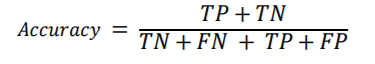

In [39]:
data = {
     'Training Set Accuracy': accuracy_score(y_true = y_train, y_pred = y_pred_train),
     'Test Set Accuracy': accuracy_score(y_true = y_test, y_pred = y_pred)
}

df_models_ID3 = pd.DataFrame(data,index=['Decision Tree'])
df_models_ID3

,Training Set Accuracy,Test Set Accuracy
Decision Tree,0.852577,0.85495


### Confusion Matrix Hasil Klasifikasi Data Test Menggunakan Decision Tree

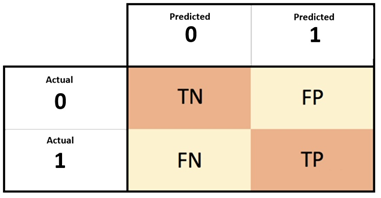

- True Positive (TP) : ketika prediksi 1 dan faktanya 1
- True Negative (TN) : ketika prediksi 0 dan faktanya 0 
- False Positive (FP) : ketika prediksi 1 dan faktanya 0
- False Negative (FN) : ketika prediksi 0 dan faktanya 1

Pada kasus ini
- 0 menyatakan income <=50k
- 1 menyatakan income >50k

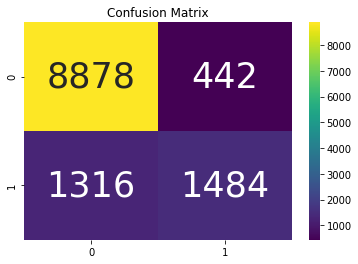

In [40]:
matrix = confusion_matrix(y_test, y_pred) 
sns.heatmap(data=matrix,cmap="viridis",annot=True,fmt=".0f",annot_kws={"size":35},).set_title('Confusion Matrix')
plt.show()

### Classification Report Data Test Menggunakan Decision Tree

#### Precision
Presisi adalah tingkat ketepatan antara informasi yang diminta oleh pengguna dengan jawaban yang
diberikan oleh sistem. Persamaan presisi adalah sebagai berikut.
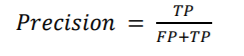


#### Recall
Recall adalah tingkat keberhasilan sistem dalam menemukan kembali sebuah informasi. Persamaan
recall adalah sebagai berikut.
𝑅𝑒𝑐𝑎𝑙𝑙 =
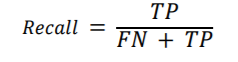

#### F1-Score
F1 Score adalah perbandingan rata-rata antara precision dan recall. Score ini akan
memperhitungkan false positive dan false negative. Persamaan F1 Score adalah sebagai berikut.
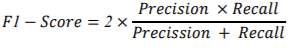

In [41]:
print('Classification Report : ')
print(classification_report(y_test, y_pred))

Classification Report : 
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91      9320
         1.0       0.77      0.53      0.63      2800

    accuracy                           0.85     12120
   macro avg       0.82      0.74      0.77     12120
weighted avg       0.85      0.85      0.84     12120



## Naive Bayes Model

Model naive bayes dibangun dengan parameter default

In [42]:
from sklearn.naive_bayes import GaussianNB

model_NB = GaussianNB()
model_NB.fit(x_train, y_train)
y_pred_NB = model_NB.predict(x_test)
y_pred_train_NB = model_NB.predict(x_train)

In [43]:
data = {
     'Training Set Accuracy': accuracy_score(y_true = y_train, y_pred = y_pred_train_NB),
     'Test Set Accuracy': accuracy_score(y_true = y_test, y_pred = y_pred_NB)
}

df_models_NB = pd.DataFrame(data,index=['Naive Bayes'])
df_models_NB

,Training Set Accuracy,Test Set Accuracy
Naive Bayes,0.811293,0.814191


### Confusion Matrix Hasil Klasifikasi Data Test Menggunakan Naive Bayes

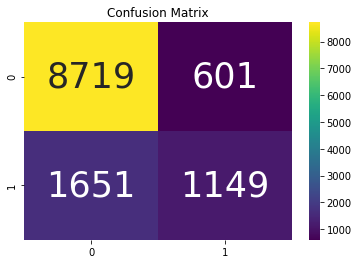

In [44]:
matrix = confusion_matrix(y_test, y_pred_NB) 
sns.heatmap(data=matrix,cmap="viridis",annot=True,fmt=".0f",annot_kws={"size":35},).set_title('Confusion Matrix')
plt.show()

### Classification Report Data Test Menggunakan Naive Bayes

In [45]:
print('Classification Report : ')
print(classification_report(y_test, y_pred_NB))

Classification Report : 
              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89      9320
         1.0       0.66      0.41      0.51      2800

    accuracy                           0.81     12120
   macro avg       0.75      0.67      0.70     12120
weighted avg       0.80      0.81      0.80     12120



## Perbandingan Akurasi Model Decision Tree dengan Naive Bayes

In [46]:
data = {
    'Train Set Accuracy' : [accuracy_score(y_true = y_train, y_pred = y_pred_train),
                           accuracy_score(y_true = y_train, y_pred = y_pred_train_NB)],
    'Test Set Accuracy' : [accuracy_score(y_true = y_test, y_pred = y_pred), 
                            accuracy_score(y_true = y_test, y_pred = y_pred_NB)]
}

df_models_compare = pd.DataFrame(data,index=['Decision Tree','Naive Bayes'])
df_models_compare

,Train Set Accuracy,Test Set Accuracy
Decision Tree,0.852577,0.854950
Naive Bayes,0.811293,0.814191
